In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
tqdm.pandas()
from openai import OpenAI
import os

pd.set_option('display.max_columns',None)

<h3> 1. Importing ABT</h3>

In [5]:
df_feat = pd.read_parquet('../data/02_pre_proc/ABT_feats.parquet')
df_feat.sample()

,USER_ID,FK_GAME_NAME,GAMEPLAY_HOURS,release_from_now,Estimated owners,Peak CCU,Price,DLC count,About the game,Supported languages,Reviews,Achievements,Recommendations,Notes,Categories,Genres,Tags
2397,101369449,zombiepanicsource,395.0,5987.0,750000.0,43,0.0,1,Dive into the zombie apocalypse with Zombie Pa...,"['English', 'Russian', 'French', 'Italian', 'G...",“The thrill of fending off a zombie hoard who ...,106,0,None,"Multi-player,PvP,Online PvP,Co-op,Online Co-op...","Action,Casual,Free to Play,Indie","Free to Play,Zombies,Multiplayer,Action,Surviv..."


<Axes: >

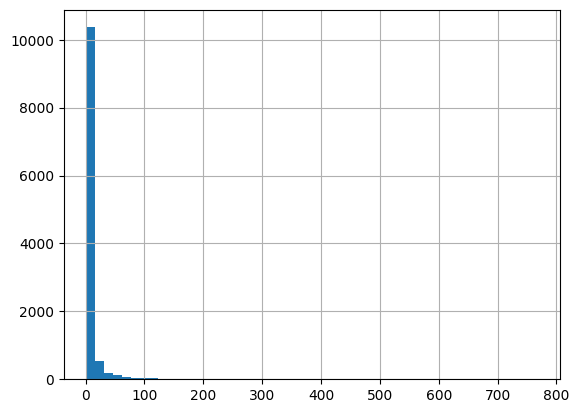

In [7]:
gb = df_feat.groupby('USER_ID')['FK_GAME_NAME'].count().reset_index().sort_values('FK_GAME_NAME',ascending=False)
gb.FK_GAME_NAME.hist(bins=50)

Alunos pós filtro:  861


<Axes: >

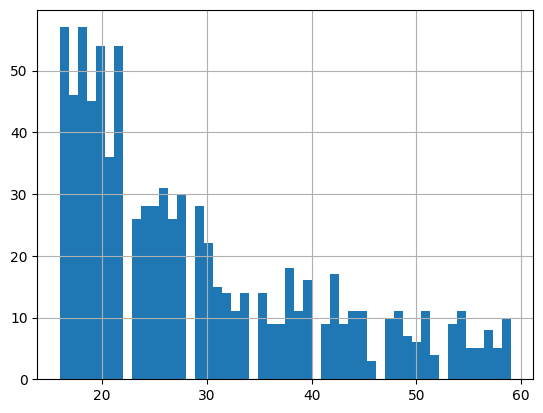

In [8]:
#Filtering customers with more than 15  and less than 60 purchased games 
gb=gb[(gb.FK_GAME_NAME>15)&(gb.FK_GAME_NAME<60)]
print("Alunos pós filtro: ",gb.shape[0])
gb.FK_GAME_NAME.hist(bins=50)

In [9]:
#filtro sobre a ABT
df_feat = df_feat[df_feat.USER_ID.isin(gb.USER_ID)]
df_feat.USER_ID.nunique()

861

In [10]:
df_feat.shape

(25000, 17)

In [ ]:
client = OpenAI(api_key = os.getenv('openai_apikey'))
model="text-embedding-3-small"
 
def generate_embeddings(text, client, model):
    text=[text]
    response = client.embeddings.create(
        input = text,
        model=model).data[0].embedding
    embeddings = response['data'][0]['embedding']
    return embeddings

embedding_feats=['About the game','Supported languages','Reviews','Categories','Genres','Tags']
for col in embedding_feats:
    print(col)
    df_feat[col] = df_feat[col].fillna(f'Sem dados de {col}')
    df_feat[col] = df_feat[col].astype(str)
    df_feat[col] = df_feat[col].progress_apply(lambda x: generate_embeddings(x, client, model))

In [ ]:
#df_feat.to_parquet('../data/03_refined/ABT_feats_aboutgame.parquet')

In [13]:
df_feat = pd.read_parquet('../data/03_refined/ABT_feats_supported_lang.parquet')
df_feat.sample()

,USER_ID,FK_GAME_NAME,GAMEPLAY_HOURS,release_from_now,Estimated owners,Peak CCU,Price,DLC count,About the game,Supported languages,Reviews,Achievements,Recommendations,Notes,Categories,Genres,Tags
12770,69856757,sidmeierscivilizationv,84.0,5269.0,7500000.0,21665,29.99,15,"[-0.015705469995737076, 0.03073655255138874, 0...","[-0.08260183781385422, -0.001638168003410101, ...",None,286,113301,None,"Single-player,Multi-player,Steam Achievements,...",Strategy,"Turn-Based Strategy,Strategy,Turn-Based,Multip..."
